# <u><u>LENDING CLUB CASE STUDY</u> </u>

# The company wants to understand the driving factors for loan default and use the insights for its portfolio and risk assesment.
<div>
<img src="/loandata.png"  width="200" height="121"/>
</div>

## The loan dataset contains the complete loan data for all loans issued through the time period 2007 t0 2011.

IMPORTING THE NECESSARY PACKAGES

In [39]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
# To ignore warnings
warnings.filterwarnings(action='ignore')

LOADING THE DATA

In [48]:
loans = pd.read_csv('loan.csv')
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 500)  
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [49]:
# Util function to understand the shape of dataframe 
def get_shape(df):
    rows, columns = df.shape
    print(f"The given dataset contains {rows} rows and {columns} columns")

get_shape(loans)

The given dataset contains 39717 rows and 111 columns


In [50]:
# Lets print the column names for ease of read and read the data dictionary to understand their meanings
for col in loans.columns:
    print(col+'\n')

id

member_id

loan_amnt

funded_amnt

funded_amnt_inv

term

int_rate

installment

grade

sub_grade

emp_title

emp_length

home_ownership

annual_inc

verification_status

issue_d

loan_status

pymnt_plan

url

desc

purpose

title

zip_code

addr_state

dti

delinq_2yrs

earliest_cr_line

inq_last_6mths

mths_since_last_delinq

mths_since_last_record

open_acc

pub_rec

revol_bal

revol_util

total_acc

initial_list_status

out_prncp

out_prncp_inv

total_pymnt

total_pymnt_inv

total_rec_prncp

total_rec_int

total_rec_late_fee

recoveries

collection_recovery_fee

last_pymnt_d

last_pymnt_amnt

next_pymnt_d

last_credit_pull_d

collections_12_mths_ex_med

mths_since_last_major_derog

policy_code

application_type

annual_inc_joint

dti_joint

verification_status_joint

acc_now_delinq

tot_coll_amt

tot_cur_bal

open_acc_6m

open_il_6m

open_il_12m

open_il_24m

mths_since_rcnt_il

total_bal_il

il_util

open_rv_12m

open_rv_24m

max_bal_bc

all_util

total_rev_hi_lim

inq_fi

tot

In [51]:
# The problem statement is focused only on the loans defaulted and not defaulted in the past, hence loan_status would be our target column
# Lets see what unique values they have got
loans.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [86]:
# Lets examine the split of data based on these statuses

# aggregating based on the count of loan status and resetting the index for plotting x and y
data_count_by_loan_status = loans.groupby('loan_status')['loan_status'].agg(['count']).sort_values(by='count', ascending=False)
data_count_by_loan_status['percent'] = round(data_count_by_loan_status['count']/len(loans) * 100, 2)

data_count_by_loan_status.reset_index( inplace= True) 
data_count_by_loan_status['index'] = data_count_by_loan_status['loan_status']
data_count_by_loan_status.set_index('index', inplace=True)
# sns.barplot(data=data_count_by_loan_status, x="loan_status", y="count")

# # print(f"{data_count_by_loan_status['Fully Paid']['percent']} of the loans are fully paid")
print(f"{data_count_by_loan_status.loc[['percent','Fully Paid']]} of the loans are fully paid")
# # print(f"{data_count_by_loan_status['Current']['percent']} of the loans are fully paid")

data_count_by_loan_status

KeyError: "['percent'] not in index"

In [59]:
# From the above visual, it is clear that there is certain amount of rows with `loan status = current`, which can be filtered out for this analysis
needed_loan_status = ['Fully Paid', 'Charged Off']

# closed loan represent which are in terminal status like fully paid or charged off 
closed_loans = loans[loans['loan_status'].isin(needed_loan_status)]

# Now let's check the shape.. the no. of rows should have been reduced now
get_shape(closed_loans)

# Lets also check the unique values to ensure current loans are removed
closed_loans['loan_status'].unique()

The given dataset contains 38577 rows and 111 columns


array(['Fully Paid', 'Charged Off'], dtype=object)

In [ ]:
# Now lets examine the columns with missing values

missing_value_percent = closed_loans.


In [55]:
loans.loan_status

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

**Since we have 111 columns, lets see if we can drop something by missing values or nulls. Lets visualise the missing values in columns using bar chart. For this we are using a python package missingno**

In [4]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot: >

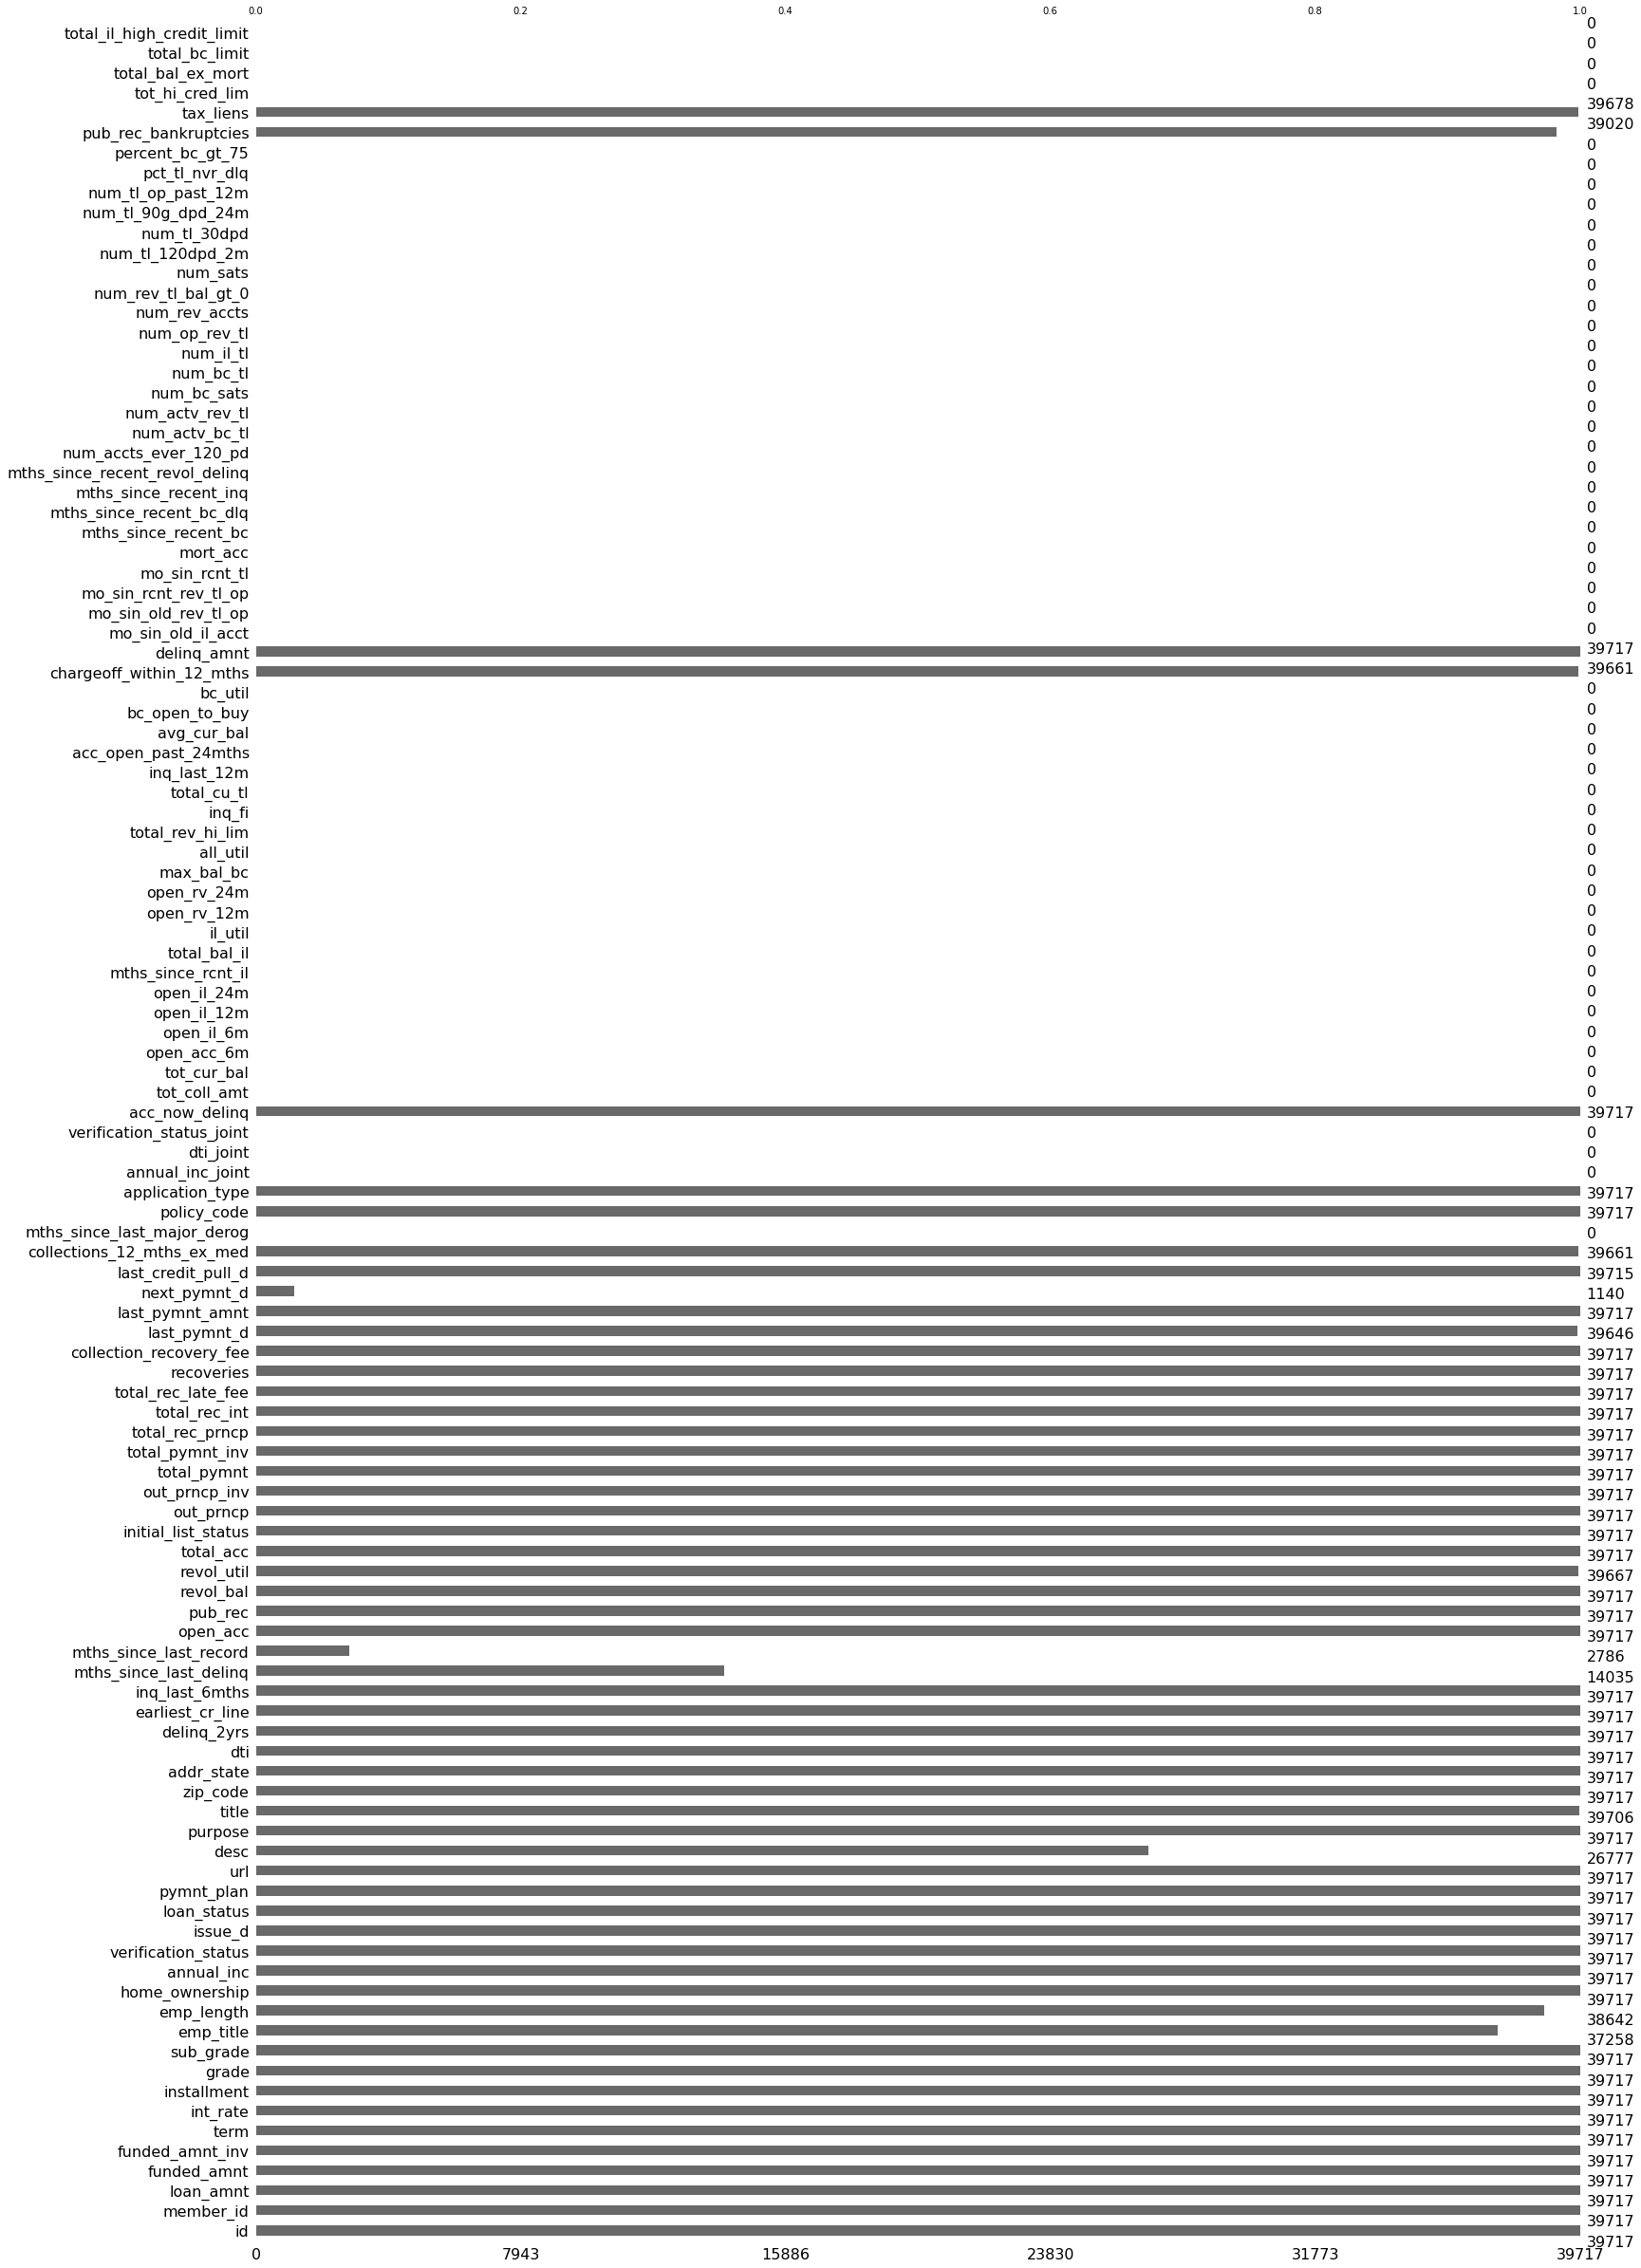

In [5]:
# The missingno library helps to visualise the columns with missing values quickly. As we see more than half of columns
# dont have any value.Hence we can drop them in next step
import missingno as msno
msno.bar(loans, orientation="left")

From the above visual we can clearly observe that many of the columns have a missing values and the bar is flat. For the sake of this analysis lets remove the columns all missing values first and then inspect the shape

In [6]:
loans = loans.dropna(how="all", axis= 1)
loans.shape

(39717, 57)

In [7]:
pip install kneed


Note: you may need to restart the kernel to use updated packages.


In [8]:
## The kneedle shows the threshold around 55 %, hence we will use 55% as the threshold for missing values and remove all the columns that crosses the threshold
missing_stat = pd.DataFrame({'column': loans.columns, '%missing': loans.isnull().sum()/len(loans) *100 })
missing_stat['%missing'] = missing_stat['%missing'].apply(lambda x: int(x))
missing_stat = missing_stat.sort_values("%missing", ascending = True, axis=0, inplace= False)

missing_stat

,column,%missing
id,id,0
pub_rec,pub_rec,0
revol_bal,revol_bal,0
revol_util,revol_util,0
total_acc,total_acc,0
initial_list_status,initial_list_status,0
out_prncp,out_prncp,0
out_prncp_inv,out_prncp_inv,0
total_pymnt,total_pymnt,0
total_pymnt_inv,total_pymnt_inv,0


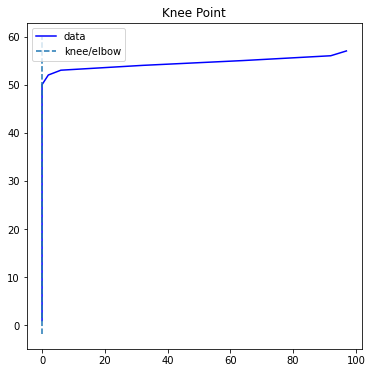

In [9]:
x = missing_stat['%missing'].to_numpy()
y = np.array(np.arange(1,58))
from kneed import DataGenerator, KneeLocator
kneedle = KneeLocator(x, y, S=1.0, curve="convex", direction="increasing")
kneedle.plot_knee()

Notice that after dropping columns with all  values missing , the number of columns reduced from 111 to 57 ..WOOHO!

Since we have more 

In [10]:
loans[ ['loan_amnt', 'int_rate' ]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   loan_amnt  39717 non-null  int64 
 1   int_rate   39717 non-null  object
dtypes: int64(1), object(1)
memory usage: 620.7+ KB
